### Differentiation of tensor networks

This notebook describes examples on how to use differentiation to get the argmax of a tensornetwork. Each axis has to have only 2 dimensions!

In [1]:
import torch
import tensor

A Tensor can be created using a serialized form. 
1. tensor in serialized form:
<br>
- the value $(i_1, ... , i_k)$ in the Tensor is in place $\sum _{j=1} ^k i_j\cdot 2^{j-1}$ in the serialization
<br>
2. tensor with single axis:
<br>
- t = torch.tensor([a, b], dtype=torch.float32, requires_grad=True)
<br>
3. tensors with multiple axis:
<br>
- t = torch.tensor([serialized form of t])
- you dont need a gradient for this since only the derivatives of the single axis matter
<br>
5. tensornetwork:
<br>
- create the tensornetwork containing all tensors
<br>
5. axis:
<br>
- create a list containing lists with all axis of the tensors (the same order as in the tensornetwork)
<br>
6. contraction:
<br>
- call tensor.full_contraction_easy(., ., .)
- the first argument is a list of all tensors from which we want the derivative (these are the single axis tensors)
- the second is the tensornetwork and the third argument are the axises of the tensors

In [2]:
t_1 = torch.tensor([0, 1], dtype=torch.float32, requires_grad=True)
t_2 = torch.tensor([0, 2], dtype=torch.float32, requires_grad=True)
t_3 = torch.tensor([0, 1], dtype=torch.float32, requires_grad=True)
t_12 = torch.tensor([0, 0, 0, -3])
t_23 = torch.tensor([0, 0, 0, 2])
t_13 = torch.tensor([0, 0, 0, 1])

In [3]:
tn = [t_1, t_2, t_3, t_12, t_23, t_13]
tn_axis = [[1], [2], [3], [1, 2], [2, 3], [1, 3]]
print(tensor.full_contraction_easy([t_1, t_2, t_3], tn, tn_axis))

[tensor([1., 0.]), tensor([0., 1.]), tensor([0., 1.])]


### multiple Maxima

an example without a unique maximum. The algorithm chooses one configuration. The configuration seems to be always the same.

In [4]:
t_1 = torch.tensor([0, 1], dtype=torch.float, requires_grad=True)
t_2 = torch.tensor([0, 1], dtype=torch.float, requires_grad=True)
t_12 = torch.tensor([0, 0, 0, -1], dtype=torch.float, requires_grad=True)

In [5]:
tn = [t_1, t_2, t_12]
tn_axis = [[1], [2], [1, 2]]
print(tensor.full_contraction_easy([t_1, t_2], tn, tn_axis))

[tensor([0., 1.]), tensor([1., 0.])]


### second method for contraction

there are a lot of different possibilities for the contraction of a tensornetwork. The method above is the easiest to implement, but it should also be the slowest. You can use combination and aggregation for a single axis and this should be faster.

In [6]:
t_1 = torch.tensor([0, 1], dtype=torch.float, requires_grad=True)
t_2 = torch.tensor([0, 1], dtype=torch.float, requires_grad=True)
t_12 = torch.tensor([0, 0, 0, -1], dtype=torch.float, requires_grad=True)

tn = [t_1, t_2, t_12]
tn_axis = [[1], [2], [1, 2]]
max_axis = 2

print(tensor.full_contraction_complicated([t_1, t_2], tn, tn_axis, max_axis))

[tensor([0., 1.]), tensor([1., 0.])]


In [7]:
t_1 = torch.tensor([0, 1], dtype=torch.float32, requires_grad=True)
t_2 = torch.tensor([0, 2], dtype=torch.float32, requires_grad=True)
t_3 = torch.tensor([0, 1], dtype=torch.float32, requires_grad=True)
t_12 = torch.tensor([0, 0, 0, -3])
t_23 = torch.tensor([0, 0, 0, 2])
t_13 = torch.tensor([0, 0, 0, 1])

tn = [t_1, t_2, t_3, t_12, t_23, t_13]
tn_axis = [[1], [2], [3], [1, 2], [2, 3], [1, 3]]
max_axis = 3

print(tensor.full_contraction_complicated([t_1, t_2, t_3], tn, tn_axis, max_axis))

[tensor([1., 0.]), tensor([0., 1.]), tensor([0., 1.])]


Comparing the time of both approaches:

In [8]:
t_1, d_1, t_2, d_2 = tensor.compare_algorithms(1, 8)

print(f"time for slow contraction: {t_1}. The derivative needed {d_1} time, time for fast contraction: {t_2}. The derivative needed {d_2} time")
print(f"time for computation: easy contraction {t_1 - d_1}, complicated contraction {t_2 - d_2}")

Starting Iteration  0
time for slow contraction: 0.014981746673583984. The derivative needed 0.008934736251831055 time, time for fast contraction: 0.013552188873291016. The derivative needed 0.008037328720092773 time
time for computation: easy contraction 0.00604701042175293, complicated contraction 0.005514860153198242


Starting with axis:  1
Starting Iteration  0
Starting Iteration  1
Starting Iteration  2
Starting Iteration  3
Starting Iteration  4
Starting Iteration  5
Starting Iteration  6
Starting Iteration  7
Starting Iteration  8
Starting Iteration  9
Starting with axis:  2
Starting Iteration  0
Starting Iteration  1
Starting Iteration  2
Starting Iteration  3
Starting Iteration  4
Starting Iteration  5
Starting Iteration  6
Starting Iteration  7
Starting Iteration  8
Starting Iteration  9
Starting with axis:  3
Starting Iteration  0
Starting Iteration  1
Starting Iteration  2
Starting Iteration  3
Starting Iteration  4
Starting Iteration  5
Starting Iteration  6
Starting Iteration  7
Starting Iteration  8
Starting Iteration  9
Starting with axis:  4
Starting Iteration  0
Starting Iteration  1
Starting Iteration  2
Starting Iteration  3
Starting Iteration  4
Starting Iteration  5
Starting Iteration  6
Starting Iteration  7
Starting Iteration  8
Starting Iteration  9
Starting with axis:  5
Start

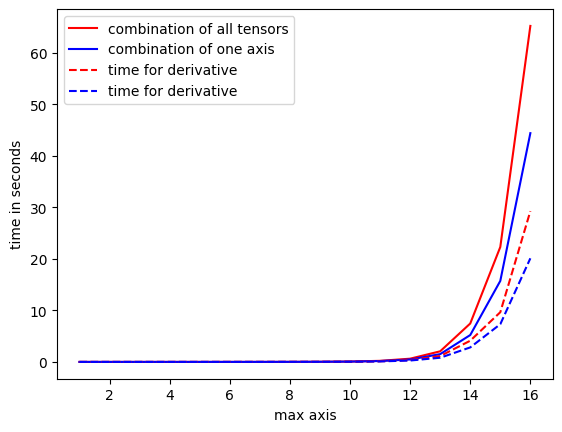

In [12]:
import matplotlib.pyplot as plt

def plot_time(n, max_axis):
    x = [i for i in range(1, max_axis + 1)]
    y_1 = []
    y_2 = []
    y_d_1 = []
    y_d_2 = []
    for i in range(1, max_axis + 1):
        print("Starting with axis: ", i)

        t_1, d_1, t_2, d_2 = tensor.compare_algorithms(n, i)
        y_1.append(t_1)
        y_2.append(t_2)
        y_d_1.append(d_1)
        y_d_2.append(d_2)

    plt.plot(x, y_1, label="combination of all tensors", color="red")
    plt.plot(x, y_2, label="combination of one axis", color="blue")
    plt.plot(x, y_d_1, label="time for derivative", color="red", linestyle="dashed")
    plt.plot(x, y_d_2, label="time for derivative", color="blue", linestyle="dashed")
    plt.xlabel("max axis")
    plt.ylabel("time in seconds")
    plt.legend()
    plt.show()

    return y_1, y_2, y_d_1, y_d_2

y_1, y_2, y_d_1, y_d_2 = plot_time(10, 16)